In [211]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.linear_model import LogisticRegression

# Problem 1

## Problem 1.a

In [102]:
# Load the data
biden_df = pd.read_csv('biden.csv')
biden_df.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [103]:
y = biden_df['biden']
X = biden_df[['female', 'age', 'educ', 'dem', 'rep']]

In [104]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=25)

In [105]:
# Perform a decision tree regression
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

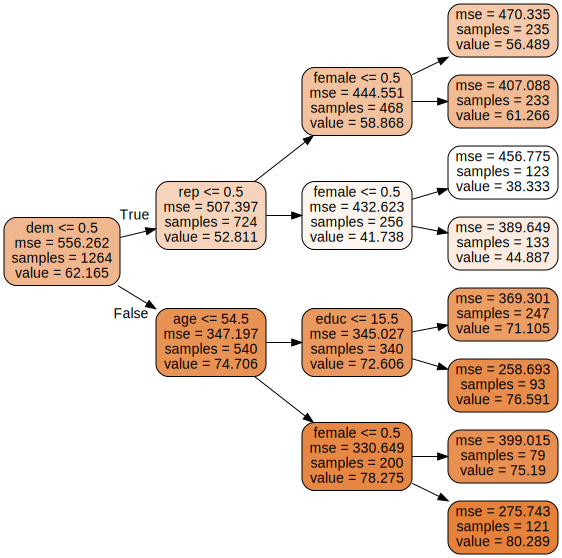

In [106]:
# Export the visualization and display the graph
biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=['female', 'age', 'educ', 'dem', 'rep'],
    rounded=True,
    filled=True,
    rotate=True
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

### Interpretation

The decision tree gives the outcome of stratifying the predictor space and fitting the data with the minimized mean squared error, given the constraints of maximum depth and minimum number of samples on each leaf. Political identity is the most important factor that related to one's attitude towards Biden. For those who are not Democrats, whether or not they are Republicans, being a female is related to higher feeling thermometer, which is intuitively consistent with people's attitutes to the photos from his youth. Among Democrats, Biden enjoys a overall higher feeling thermometer - of course, Biden is a Democrats himself - and is especially popular among Democrats who are over 55 years old. For Democrats who are over 55 years old, female people like Biden more than those who are not female, and for democrats who are below 55 years old, people with more than 16 years of formal education responded with higher feeling thermometer. 

In [107]:
# Calculate MSE on the testing set
y_pred = biden_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('test MSE: ', MSE)

test MSE:  396.1937146321307


## Problem 1.b

In [111]:
# The following modules have already been imported. 
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform

# specify parameters and distributions to sample from
param_dist1 = {'max_depth': [3, 10],    # ??? This will only try 3 and 10, wonder if a more reasonably specification could be sp_randint(3, 10) ???
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

biden_tune = DecisionTreeRegressor()

# Run randomized hyperparameter search
random_search1 = \
    RandomizedSearchCV(biden_tune, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search1.fit(X_train, y_train)

# Print the result
print('The model is trained on the 70% training set. \n')
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)



# Uncomment to use GridSearchCV to run grid search hyperparameter search
# ======================================================================

# param_grid1 = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
#                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# grid_search1 = \
#     GridSearchCV(hittree3, param_grid=param_grid1,
#                        n_jobs=-1, cv=5,
#                        scoring='neg_mean_squared_error')

# grid_search1.fit(X, y)
# print('GridBestEstimator1=', grid_search1.best_estimator_)
# print('GridBestParams1=', grid_search1.best_params_)
# print('GridBestScore1=', -grid_search1.best_score_)

The model is trained on the 70% training set. 

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 9}
RandBestScore1= 404.7488359884144


## Problem 1.c

In [112]:
# specify parameters and distributions to sample from
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 5)}

biden_randforest = RandomForestRegressor(bootstrap=True, random_state=25)

# Run randomized hyperparameter search
random_search2 = \
    RandomizedSearchCV(biden_randforest, param_distributions=param_dist2, 
                       n_iter=100, n_jobs=-1, cv=5, random_state=25, 
                       scoring='neg_mean_squared_error')
random_search2.fit(X_train, y_train)

# Print the result
print('The model is trained on the 70% training set. \n')
print('Best estimator = ', random_search2.best_estimator_)
print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model is trained on the 70% training set. 

Best estimator =  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=19, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=25, verbose=0,
                      warm_start=False)
Best tuning parameters =  {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 19, 'min_samples_split': 11, 'n_estimators': 200}
MSE of optimal results = 397.6842454966743


# Problem 2

## Problem 2.a

In [149]:
# Load the data
auto_df = pd.read_csv("Auto.csv", na_values='?')
auto_df['mpg_high'] = np.where(auto_df['mpg'] >= np.median(auto_df['mpg']), 1, 0)
auto_df.dropna(inplace=True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


In [150]:
auto_df = pd.get_dummies(auto_df, columns=['origin'])
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,mpg_high,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,1,0,0


In [233]:
y = auto_df['mpg_high']
X = auto_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin_1', 'origin_2']]

In [154]:
# Run a Logistic regression
auto_logit = LogisticRegression(solver='liblinear', multi_class='auto')
auto_logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
result = {'mpg_high': np.append(auto_logit.intercept_[0], auto_logit.coef_[0])} 
beta_names = ['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin_1', 'origin_2']
pd.DataFrame(result, index=beta_names)

,mpg_high
const,-0.071123
cylinders,-0.093252
displacement,-0.001307
horsepower,-0.070722
weight,-0.003321
acceleration,-0.188672
year,0.263281
origin_1,-0.336594
origin_2,0.266019


In [168]:
Xvars = X.values
yvars = y.values
k = 4
kf = KFold(n_splits=4, shuffle=True, random_state=25)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
category_error_0 = np.zeros(k)
category_error_1 = np.zeros(k)

k_ind = 0
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='liblinear', multi_class='auto')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    
    category_0 = y_test == 0
    category_1 = y_test == 1
    
    category_error_0[k_ind] = sum((y_test != y_pred) * category_0) / sum(category_0)
    category_error_1[k_ind] = sum((y_test != y_pred) * category_1) / sum(category_1)    
    
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
print('test estimate MSE_k-fold=', MSE_kf)
print("average error rate for mpg_high=0:", category_error_0.mean())
print("average error rate for mpg_high=1:", category_error_1.mean())

test estimate MSE_k-fold= 0.09693877551020408
average error rate for mpg_high=0: 0.11364706285146922
average error rate for mpg_high=1: 0.07941477339674582


## Problem 2.b

In [207]:
# Fit the data using a Random Forest Classifier
mpg_forest = RandomForestClassifier(bootstrap=True, random_state=25)
mpg_forest.fit(Xvars, yvars)

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [208]:
# specify parameters and distributions to sample from
param_dist3 = {'n_estimators':[10,200],
               'max_depth': [3,8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1,8)}

mpg_forest = RandomForestClassifier(bootstrap=True, random_state=25)

# Run randomized hyperparameter search
random_search3 = RandomizedSearchCV(mpg_forest, param_distributions=param_dist3,
                                    n_iter=100, n_jobs=-1, cv=4, random_state=25,
                                    scoring='neg_mean_squared_error')
random_search3.fit(X, y)

# Print the result
print('Best estimator = ', random_search3.best_estimator_)
print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best estimator =  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)
Best tuning parameters =  {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE of optimal results = 0.08928571428571429


## Problem 2.c

In [227]:
# Fit the data using a SVC
mpg_svc= SVC(kernel="rbf")
mpg_svc.fit(X, y)

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [231]:
# specify parameters and distributions to sample from
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ["scale", "auto_deprecated"],
               'shrinking': [True,False]}


# Run randomized hyperparameter search
random_search4 = RandomizedSearchCV(mpg_svc, param_distributions=param_dist4,
                                    n_iter=100, n_jobs=-1, cv=4, random_state=25,
                                    scoring='neg_mean_squared_error')
random_search4.fit(X, y)

# Print the result
print('Best estimator = ', random_search4.best_estimator_)
print('Best tuning parameters = ', random_search4.best_params_)
print('MSE of optimal results = ', -random_search4.best_score_)

Best estimator =  SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)
Best tuning parameters =  {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE of optimal results =  0.11989795918367346


## Problem 2.d

The Random Forest model with parameters `{'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}` has the lowest MSE, which means that it has the best fit of the data. Therefore, in terms of fitting, the Random Forest model has the best performance. But, in light of the potential of overfitting, it is hard to evaluate the prediction power of the models, but we may want to use a model that has the lowest MSE on the labelled data for prediction. 